# Paris Passenger Arrivals

## Project Overview

We partnered with DFS Group to forecast travel and purchase intent of Chinese consumers to Paris. DFS Group is the worlds leading luxury travel retailer. Network consists of duty free stores located in 11 major global airports and 20 downtown T Galleria locations.

DFS has re-oriented its strategy towards the Chinese market and being as close as possible to where Chinese travellers are. As part of this strategy, DFS will be opening a new store in Paris, France. This store will have a deep focus on Chinese tourists.

Our initial goal is to predict flows of Chinese tourists into Paris. For this, we will leverage certain information owned by DFS on actual and forward looking reservation data from a proprietary database.

## Data Overview

The main data source for this exercise is Forward Keys (“FK”). FK is a company that analyses millions of daily flights and provides clients with insights for making their tactical decisions. FK crunches and analyzes over 17 million booking transactions a day. Additionally, they pull a wide range of other relevant data like flight searches and aviation capacity.

DFS provided us with a data pull from FK. This dataset contains the actual information on Chinese travelers to Paris between January 1 2015 and August 31, 2019. It also provides additional valuable information such as length of stay in Paris, total trip duration (overall), number of people per booking, lead times between booking and flight, cabin, distribution channels, type of stay, one-way/return, travel day of the week and traveler profile (i.e. business, leisure and group).

## Data Import and Prep

In [1]:
# Load Google Drive

from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
# Set working directory within the desired projects folder

%cd /content/drive/My\ Drive/Colab\ Notebooks/Projects/Paris\ Pax\ Arrivals/Exploratory\ Analysis

/content/drive/My Drive/Colab Notebooks/Projects/Paris Pax Arrivals/Exploratory Analysis


In [3]:
# Verify contents of the working directory

! ls

'forwardkeys-Arrivals-History-Paris(FR)_PAR.xlsx'
 paris_df.xlsx
 Paris_Pax_Arrivals_Exploratory_v01.ipynb
'R Analysis'


The dataset was included in a spreadsheet that contained 3 tabs, with a few tables. We imported the data and run a few data cleaning and structuring code lines to enable the subsequent data analysis.

In [4]:
# Import xlxs spreadsheet

import pandas as pd

# Import and load dataset in years 15 to 19

paris_df_15to19 = pd.read_excel('forwardkeys-Arrivals-History-Paris(FR)_PAR.xlsx', sheet_name='China-CN',skiprows=120, nrows = 1703)
paris_df_15to19.columns = ['Date', 'Total_trav', 'Total_trav_China/CN', 'Returnhome', 'ShortTransfer', 'DwellingTransfer', 'LongTransfer', 'Stopover', 'DayTrip', 
                           'LoS_1night', 'LoS_2nights', 'LoS_3nights', 'LoS_4to5nights', 'LoS_6to8nights', 'LoS_9to13nights', 'LoS_14to21nights', 'LoS_22nightsormore', 
                           'Endoftrip', 'TrDur_0night', 'TrDur_1night', 'TrDur_2nights', 'TrDur_3nights', 'TrDur_4to5nights', 'TrDur_6to8nights', 'TrDur_9to13nights', 
                           'TrDur_14to21nights', 'TrDur_22nightsormore', 'ppb_1pax', 'ppb_2pax', 'ppb_3pax', 'ppb_4pax', 'ppb_5pax', 'ppb_6to9pax', 'ppb_10pl_pax', 'LeadT_0to4days', 
                           'LeadT_5to14days', 'LeadT_15to29days', 'LeadT_30to44days', 'LeadT_45to59days', 'LeadT_60to89days', 'LeadT_90to119days', 'LeadT_120to364days', 'Cabin_Economy', 
                           'Cabin_EconomyPremium', 'Cabin_Business', 'Cabin_First', 'DistCh_OnlineTA', 'DistCh_CorporateTA', 'DistCh_RetailTA', 'DistCh_OtherTA', 'TypeSt_Weekendstay', 
                           'TypeSt_Workweekstay', 'TypeSt_Combinedstay', 'TypeSt_Nostay', 'OneRet_Oneway', 'OneRet_Return', 'OneRet_MultiCity', 'TrDay_Sunday', 'TrDay_Monday', 
                           'TrDay_Tuesday', 'TrDay_Wednesday', 'TrDay_Thursday', 'TrDay_Friday', 'TrDay_Saturday', 'Profile_Business', 'Profile_Leisure', 'Profile_Group', 'Profile_VFRndExpats', 
                           'Sign_InitialBookings', 'Sign_Partialadditions_modif', 'Sign_Partialcancellations', 'Sign_Fulltripcancellations', 'Avg.LOS', 'Avg.LOT', 'Avg.LT', 'Avg.PPB']

# Import and load dataset in years 14

paris_df_14 = pd.read_excel('forwardkeys-Arrivals-History-Paris(FR)_PAR.xlsx', sheet_name='China-CN',skiprows=1827, nrows = 365)
paris_df_14.columns = ['Date', 'Total_trav', 'Total_trav_China/CN', 'Returnhome', 'ShortTransfer', 'DwellingTransfer', 'LongTransfer', 'Stopover', 'DayTrip', 'LoS_1night', 'LoS_2nights', 
                       'LoS_3nights', 'LoS_4to5nights', 'LoS_6to8nights', 'LoS_9to13nights', 'LoS_14to21nights', 'LoS_22nightsormore', 'Endoftrip', 'TrDur_0night', 'TrDur_1night', 'TrDur_2nights', 
                       'TrDur_3nights', 'TrDur_4to5nights', 'TrDur_6to8nights', 'TrDur_9to13nights', 'TrDur_14to21nights', 'TrDur_22nightsormore', 'ppb_1pax', 'ppb_2pax', 'ppb_3pax', 'ppb_4pax', 
                       'ppb_5pax', 'ppb_6to9pax', 'ppb_10pl_pax', 'LeadT_0to4days', 'LeadT_5to14days', 'LeadT_15to29days', 'LeadT_30to44days', 'LeadT_45to59days', 'LeadT_60to89days', 'LeadT_90to119days', 
                       'LeadT_120to364days', 'Cabin_Economy', 'Cabin_EconomyPremium', 'Cabin_Business', 'Cabin_First', 'DistCh_OnlineTA', 'DistCh_CorporateTA', 'DistCh_RetailTA', 'DistCh_OtherTA', 
                       'TypeSt_Weekendstay', 'TypeSt_Workweekstay', 'TypeSt_Combinedstay', 'TypeSt_Nostay', 'OneRet_Oneway', 'OneRet_Return', 'OneRet_MultiCity', 'TrDay_Sunday', 'TrDay_Monday', 
                       'TrDay_Tuesday', 'TrDay_Wednesday', 'TrDay_Thursday', 'TrDay_Friday', 'TrDay_Saturday', 'Profile_Business', 'Profile_Leisure', 'Profile_Group', 'Profile_VFRndExpats', 
                       'Sign_InitialBookings', 'Sign_Partialadditions_modif', 'Sign_Partialcancellations', 'Sign_Fulltripcancellations', 'Avg.LOS', 'Avg.LOT', 'Avg.LT', 'Avg.PPB']


# Define frames and concatinate two dataframes

frames = [paris_df_15to19, paris_df_14]
paris_df = pd.concat(frames)

# Drop columns that have no data and are not useful for our analysis

paris_df = paris_df.drop(['Total_trav_China/CN', 'Returnhome', 'ShortTransfer', 'DwellingTransfer', 'LongTransfer', 'Stopover', 'DayTrip', 'Endoftrip', 'TrDur_0night', 'TypeSt_Nostay', 'Avg.LOS', 
                          'Avg.LOT', 'Avg.LT', 'Avg.PPB', 'TrDay_Sunday', 'TrDay_Monday', 'TrDay_Tuesday', 'TrDay_Wednesday', 'TrDay_Thursday', 'TrDay_Friday', 'TrDay_Saturday'], 
                         axis=1)
paris_df.shape

(2068, 55)

In [5]:
paris_df.dtypes

Date                           datetime64[ns]
Total_trav                              int64
LoS_1night                              int64
LoS_2nights                             int64
LoS_3nights                             int64
LoS_4to5nights                          int64
LoS_6to8nights                          int64
LoS_9to13nights                         int64
LoS_14to21nights                        int64
LoS_22nightsormore                      int64
TrDur_1night                            int64
TrDur_2nights                           int64
TrDur_3nights                           int64
TrDur_4to5nights                        int64
TrDur_6to8nights                        int64
TrDur_9to13nights                       int64
TrDur_14to21nights                      int64
TrDur_22nightsormore                    int64
ppb_1pax                                int64
ppb_2pax                                int64
ppb_3pax                                int64
ppb_4pax                          

In [6]:
# Add day of week, month, week and year columns to dataframe

paris_df['WeekDay'] = paris_df.Date.dt.day_name()
paris_df['Month'] = paris_df.Date.dt.month_name()
paris_df['Week'] = paris_df.Date.dt.weekofyear
paris_df['Year'] = paris_df.Date.dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [7]:
# Drop 2019 due to being a partial year

paris_df = paris_df[paris_df.Year != 2019]

## Arrivals Analysis

### Seaborn Bar Chart

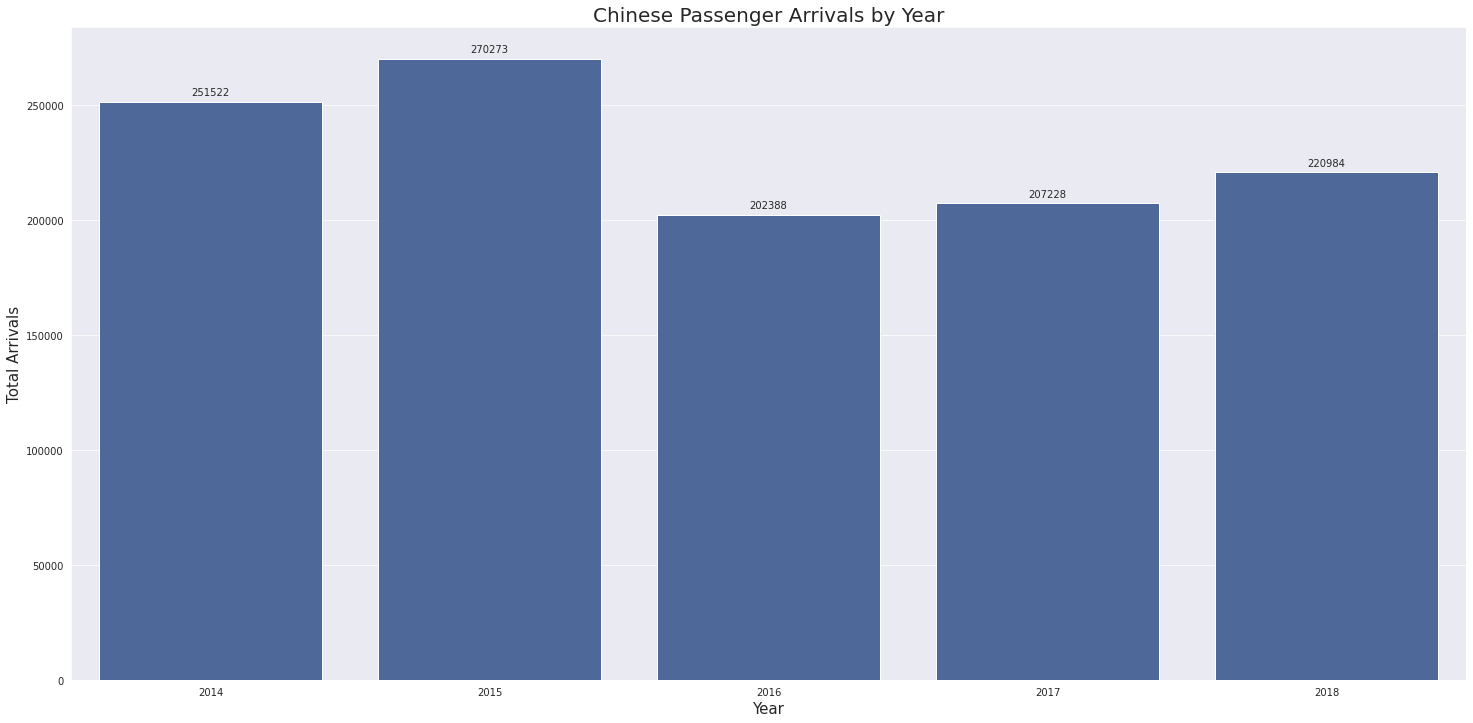

In [15]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as tkr
import seaborn as sns

# Set plot size
plt.figure(figsize=(25,12))

# Bar chart showing average arrival delay for Spirit Airlines flights by month
splot_annual_arrivals = sns.barplot(data = paris_df,
            x = 'Year', 
            y = 'Total_trav',
            estimator = sum,
            color = '#4264A5',
            ci = None)

# Add totals to each bar
for p in splot_annual_arrivals.patches:
    splot_annual_arrivals.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Year", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Year", fontsize = 15)

# Plot the chart
plt.show(splot_annual_arrivals)

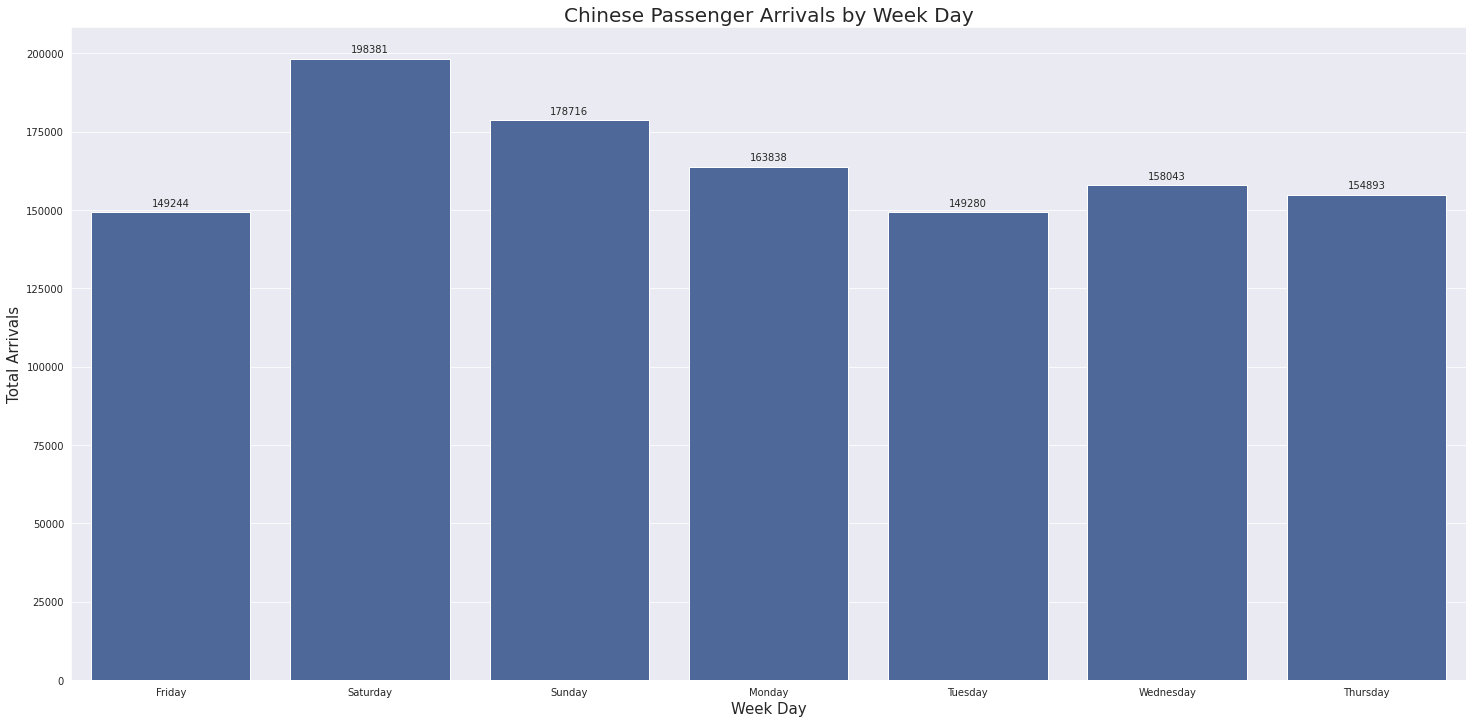

In [9]:
# Set plot size
plt.figure(figsize=(25,12))

# Bar chart showing average arrival delay for Spirit Airlines flights by week day
splot_weekday_arrivals = sns.barplot(data = paris_df,
            x = 'WeekDay', 
            y = 'Total_trav',
            estimator = sum,
            color = '#4264A5',
            ci = None)

# Add totals to each bar
for p in splot_weekday_arrivals.patches:
    splot_weekday_arrivals.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Week Day", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Week Day", fontsize = 15)

# Plot the chart
plt.show(splot_weekday_arrivals)

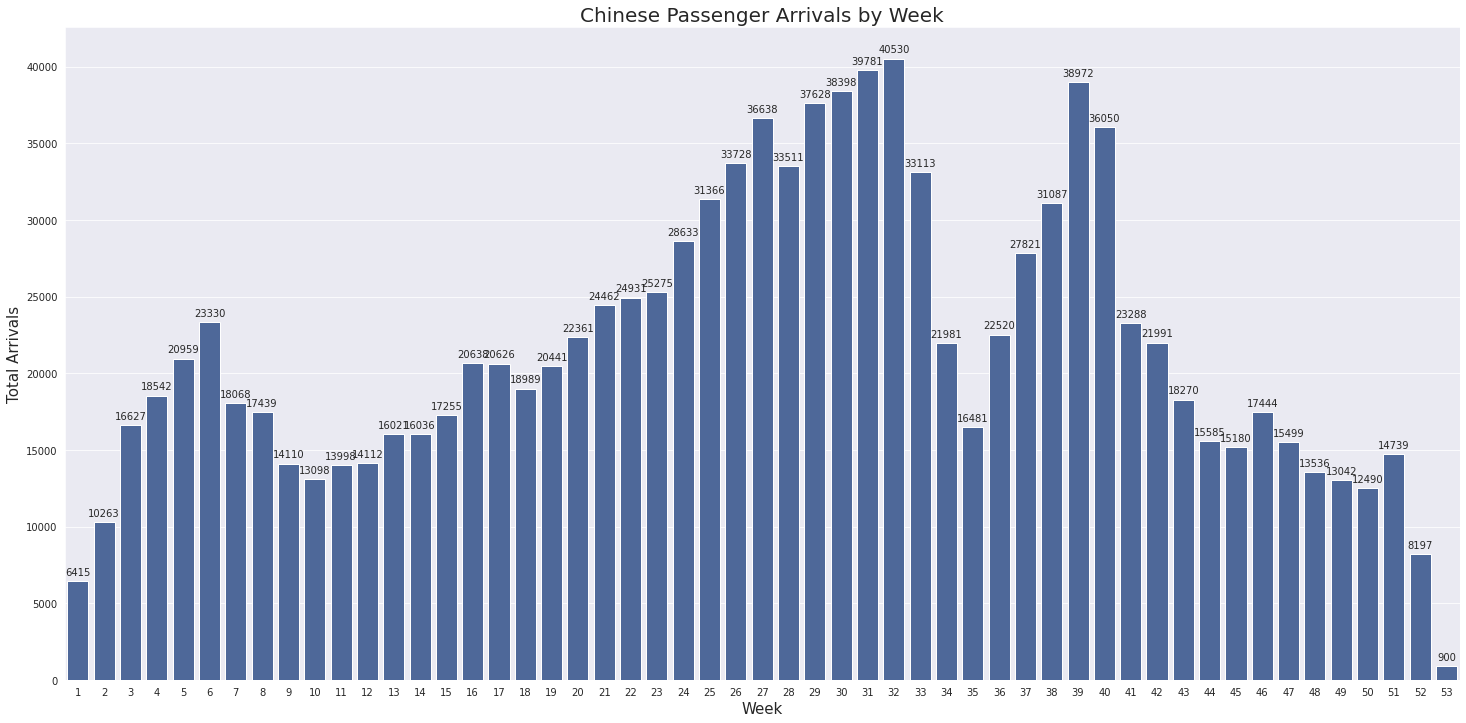

In [10]:
# Set plot size
plt.figure(figsize=(25,12))

# Bar chart showing average arrival delay for Spirit Airlines flights by week
splot_week_arrivals = sns.barplot(data = paris_df,
            x = 'Week', 
            y = 'Total_trav',
            estimator = sum,
            color = '#4264A5',
            ci = None)

# Add totals to each bar
for p in splot_week_arrivals.patches:
    splot_week_arrivals.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Week", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Week", fontsize = 15)

# Plot the chart
plt.show(splot_week_arrivals)

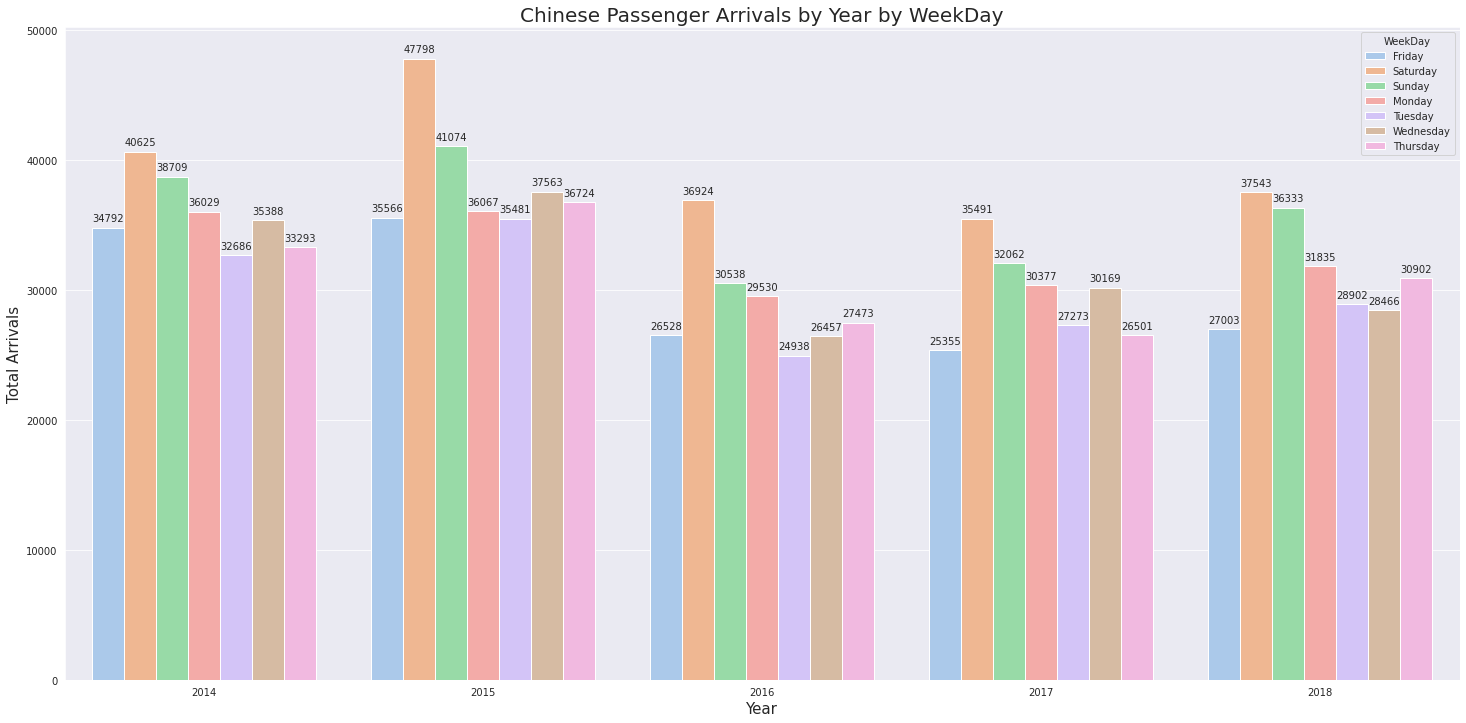

In [11]:
# Set plot size
plt.figure(figsize=(25,12))

# Set colour palette
sns.set_palette("pastel")

# Bar chart showing average arrival delay for Spirit Airlines flights by month by weekday
splot_annual_arrivals_weekday = sns.barplot(data = paris_df,
            x = 'Year', 
            y = 'Total_trav',
            hue = 'WeekDay',
            estimator = sum,
            ci = None)

# Add totals to each bar
for p in splot_annual_arrivals_weekday.patches:
    splot_annual_arrivals_weekday.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Year by WeekDay", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Year", fontsize = 15)

# Plot the chart
plt.show(splot_annual_arrivals_weekday)

### Seaborn Swarm Chart

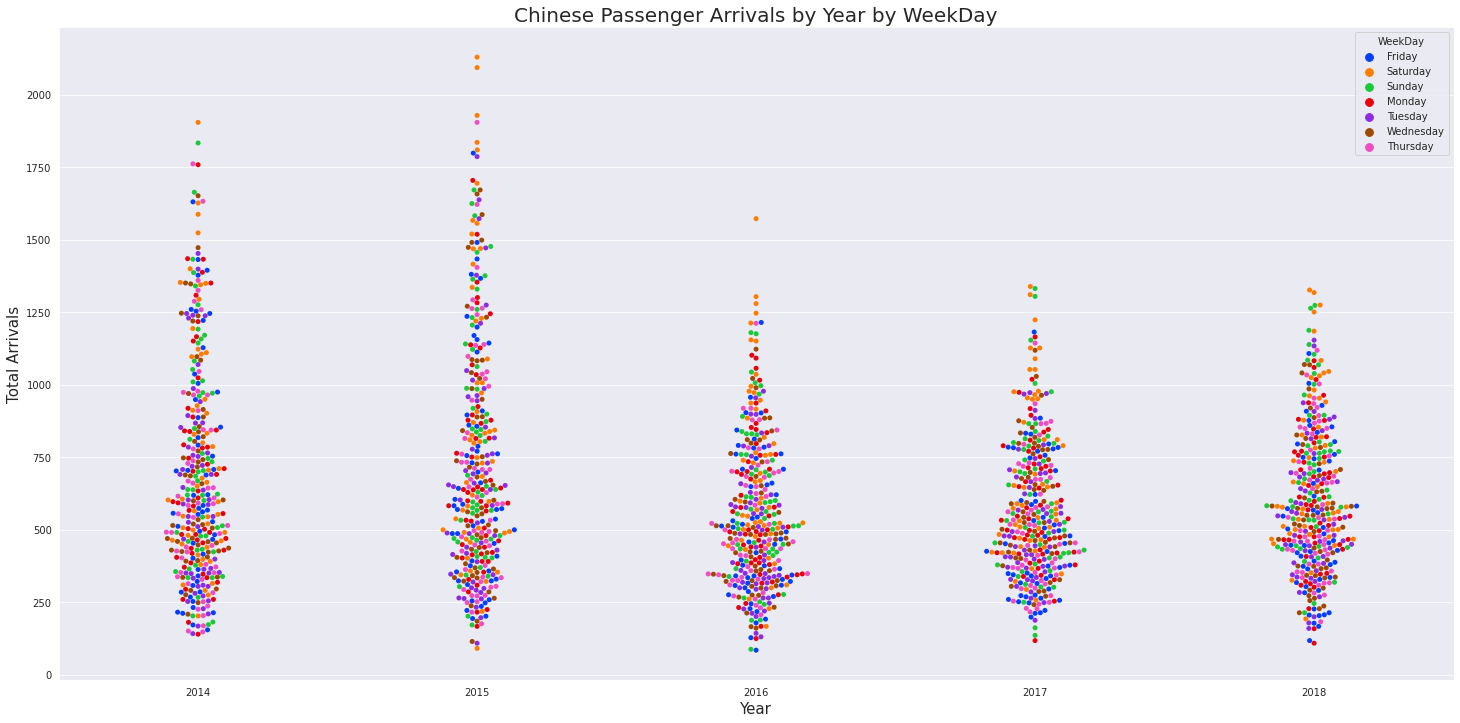

In [12]:
# Set plot size
plt.figure(figsize=(25,12))

# Set colour palette
sns.set_palette("bright")

# Swarm chart showing average arrival delay for Spirit Airlines flights by month by weekday
splot_annual_arrivals_weekday_swarm = sns.swarmplot(data = paris_df,
            x = 'Year', 
            y = 'Total_trav',
            hue = 'WeekDay')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Year by WeekDay", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Year", fontsize = 15)

# Plot the chart
plt.show(splot_annual_arrivals_weekday_swarm)

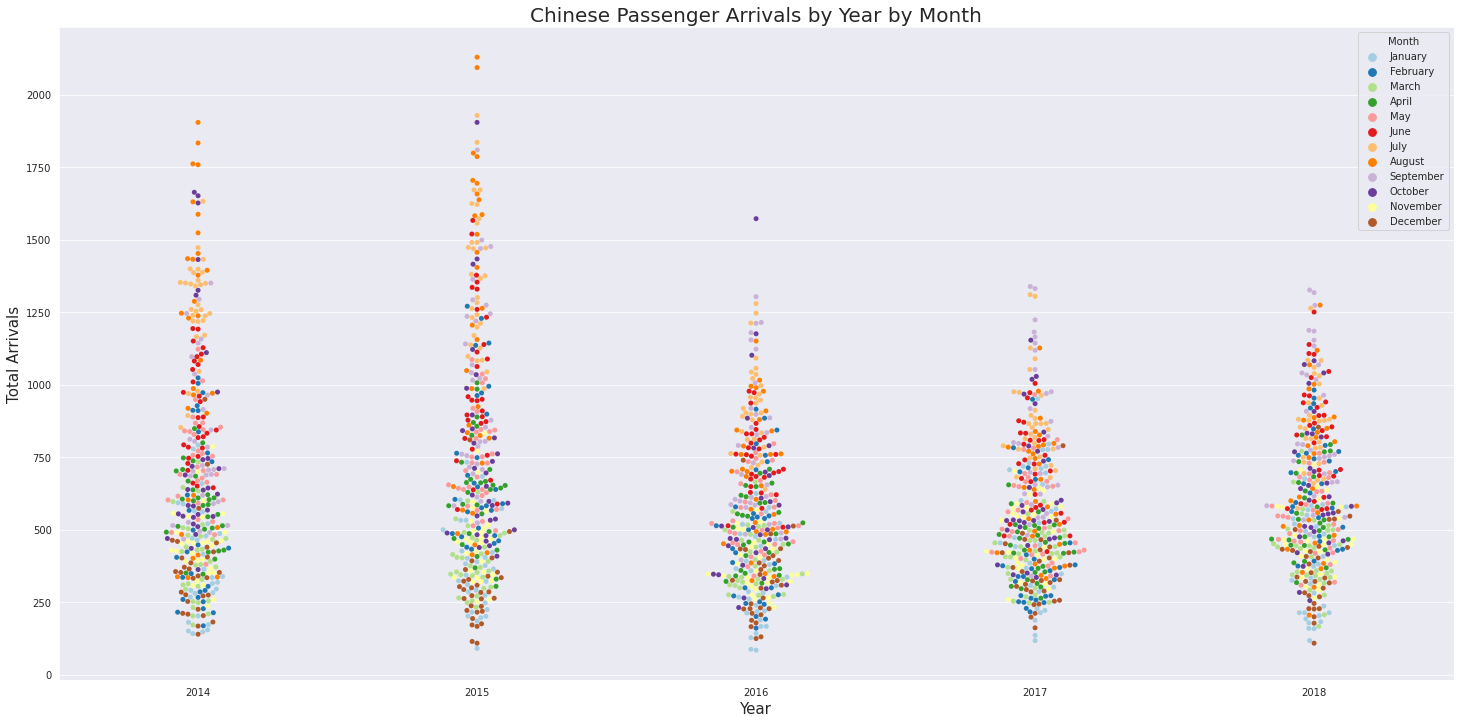

In [13]:
# Set plot size
plt.figure(figsize=(25,12))

# Set colour palette
sns.set_palette("Paired")

# Swarm chart showing average arrival delay for Spirit Airlines flights by month by month
splot_annual_arrivals_month_swarm = sns.swarmplot(data = paris_df,
            x = 'Year', 
            y = 'Total_trav',
            hue = 'Month')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Year by Month", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Year", fontsize = 15)

# Plot the chart
plt.show(splot_annual_arrivals_month_swarm)

### Seaborn Line Charts

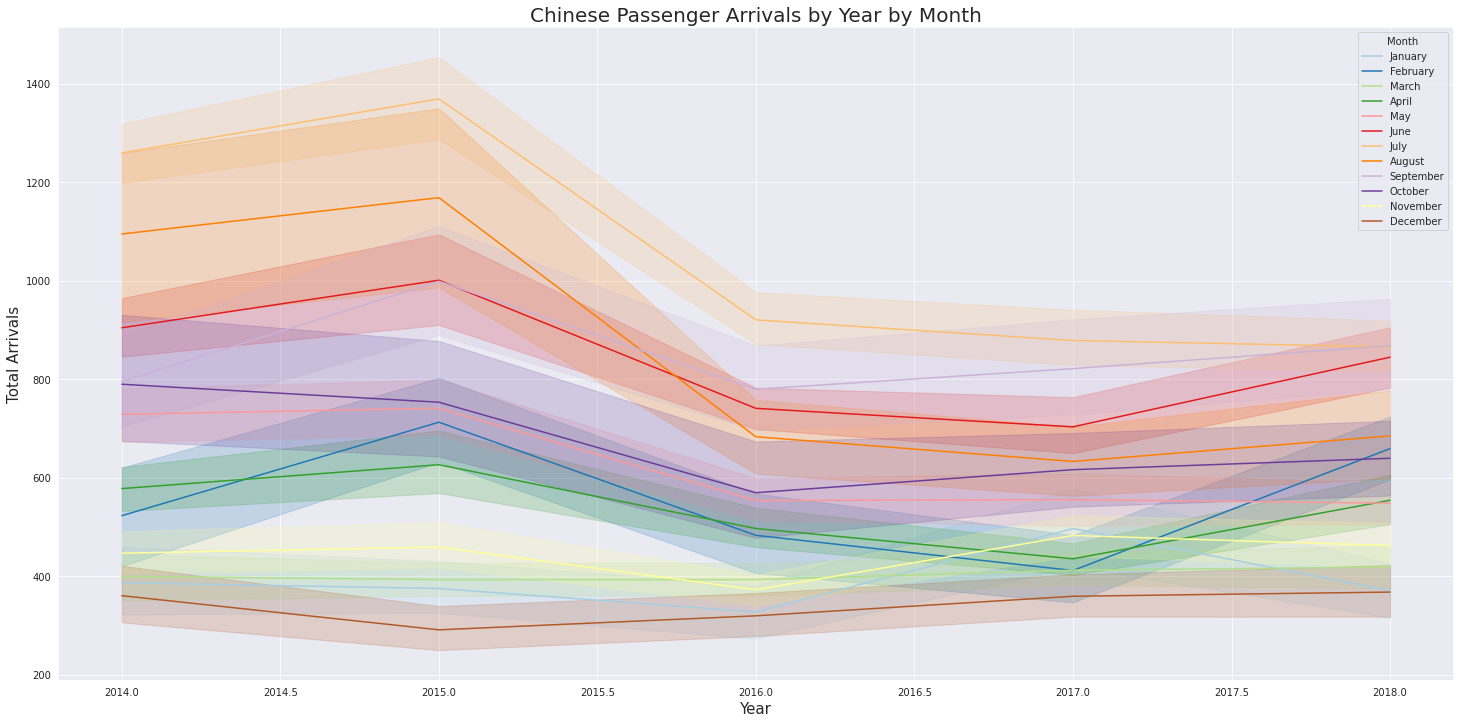

In [14]:
# Set plot size
plt.figure(figsize=(25,12))

# Set colour palette
sns.set_palette("Paired")

# Line chart showing average arrival delay for Spirit Airlines flights by month by month
splot_annual_arrivals_line = sns.lineplot(data = paris_df, x = 'Year', y = 'Total_trav', hue = 'Month')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Year by Month", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Year", fontsize = 15)

# Plot the chart
plt.show(splot_annual_arrivals_line)

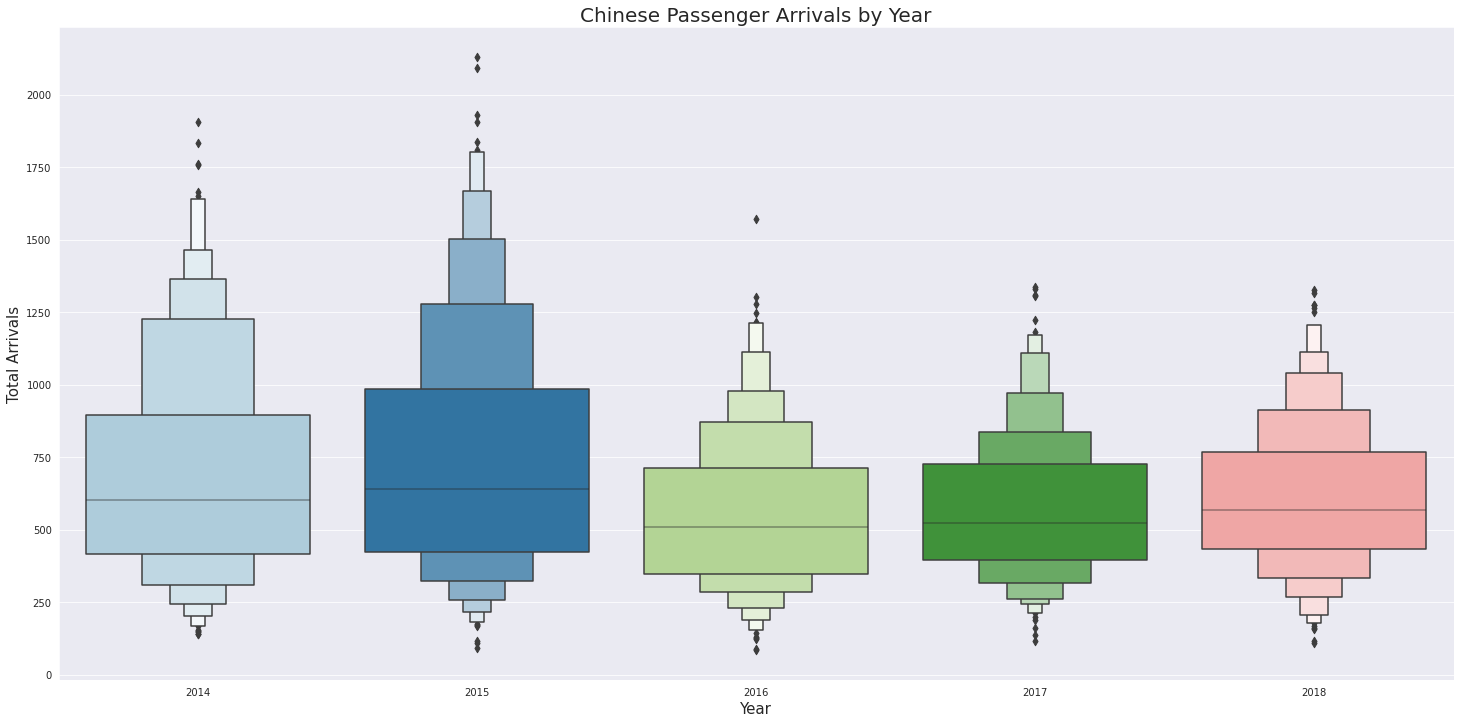

In [22]:
# Set plot size
plt.figure(figsize=(25,12))

# Boxenplot chart showing average arrival delay for Spirit Airlines flights by month by month
splot_boxenplot = sns.boxenplot(data = paris_df, x = 'Year', y = 'Total_trav')

# Set theme
sns.set_style("darkgrid")

# Add title
plt.title("Chinese Passenger Arrivals by Year", fontsize = 20)

# Add label for vertical axis
plt.ylabel("Total Arrivals", fontsize = 15)

# Add label for vertical axis
plt.xlabel("Year", fontsize = 15)

# Plot the chart
plt.show(splot_boxenplot)


<Figure size 1800x1440 with 0 Axes>

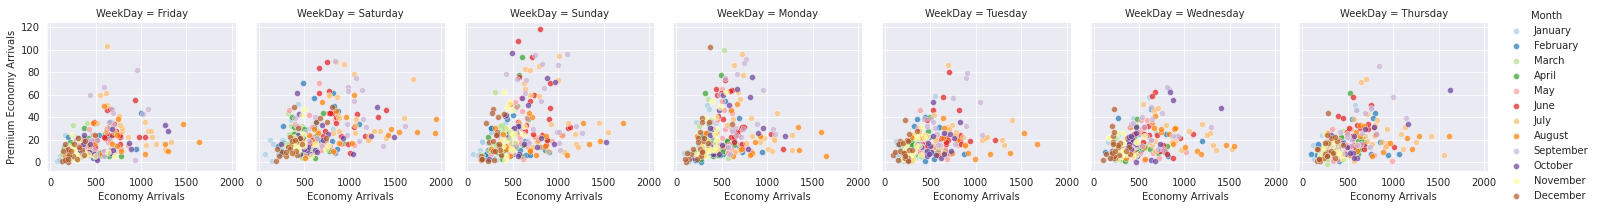

In [37]:
# Set plot size
plt.figure(figsize=(25,20))

# Boxenplot chart showing average arrival delay for Spirit Airlines flights by month by month
splot_grid = sns.FacetGrid(paris_df, col="WeekDay", hue="Month")
splot_grid.map(sns.scatterplot, "Cabin_Economy", "Cabin_EconomyPremium", alpha=.7)
splot_grid.add_legend()

# Set theme
sns.set_style("darkgrid")

# Add label for vertical axis
splot_grid.set_axis_labels("Economy Arrivals", "Premium Economy Arrivals")
